In [123]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
%load_ext autoreload
%autoreload 2
from db.database import DatabaseConnector
from dtloader.dataloader import DataLoader
from statsmodels.tsa.stattools import grangercausalitytests
from grangercausality_test import GrangerCausalityTest
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utils.utils import *
import seaborn as sns


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.tsatools import lagmat2ds
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from scipy import stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Sample log Analysis

mongodb://localhost:27017/
Database connected
Results of Dickey-Fuller Test:
Test Statistic                    0.294526
p-value                           0.977092
#Lags Used                       19.000000
Number of Observations Used    2979.000000
Critical Value (1%)              -3.432547
Critical Value (5%)              -2.862511
Critical Value (10%)             -2.567287
dtype: float64


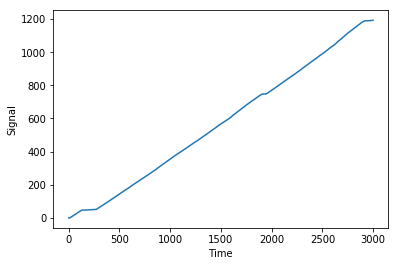

Results of Dickey-Fuller Test:
Test Statistic                -9.081987e+00
p-value                        4.033043e-15
#Lags Used                     2.700000e+01
Number of Observations Used    2.971000e+03
Critical Value (1%)           -3.432553e+00
Critical Value (5%)           -2.862513e+00
Critical Value (10%)          -2.567288e+00
dtype: float64


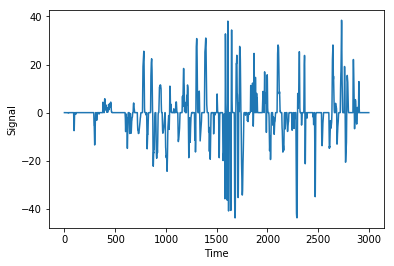

In [104]:
dl = DataLoader()
dl.load('sample.log')
dl.extractinfo(export=False,single_file=True)

#query
currtot = pd.DataFrame(dl.full_dict[('sample.log','CURR')])['CurrTot']
desroll = pd.DataFrame(dl.full_dict[('sample.log','ATT')])['DesRoll']

gc = GrangerCausalityTest()
df1,res1 = gc.stationary_test(currtot,plot=True,print_stats=True)
df2,res2 = gc.stationary_test(desroll,plot=True,print_stats=True)

## Granger Causality Sample Testing

For this test we need to put the two variables in one table with the line indexes and then test everything 

In [153]:
ts = {'ATT':['DesRoll'],'RCIN':['C1']}
dft = corr_var('sample.log',dl,ts,find_corr=False)
dft.dropna(axis=0,how='any',inplace=True)

In [155]:
gc = GrangerCausalityTest(pd_frame=dft,maxlag=10)
gc.var_grangertest()
gc.dict_res

{'ATT_DesRoll causes RCIN_C1': True,
 'RCIN_C1 causes ATT_DesRoll': True,
 'no-causal': False,
 'bc': True,
 'err': nan}

# Top 100 Variable Causality Analysis

# Top 100 Variable Stationary Analysis

In [115]:
df_100 = load_top100()
vardict = load_top100_dict()
datalist =os.listdir('../data')

In [116]:
df_100['count_stat'] = np.zeros(len(df_100))
gc = GrangerCausalityTest()
res_bool= None
for i,log in enumerate(datalist): #loop through the files
    print('File:{} --  {} / {}'.format(log,i,len(datalist)-1))
    for key,values in vardict.items(): #loop through components 
        print('Loading Key : ', key)
        res = dl.dbconnector.query(key+'_'+log[:-4]) #find signals in the log files 
        if res != -1: #data exists
                df = pd.DataFrame(res)
                #check for each value if it is stationary or not
                for val in list(set(df.columns).intersection(values)): #loop through the signals
                    if not np.issubdtype(df[val].dtype, np.number):
                            cat_to_int(df,val)
                    try:
                        _,res_bool = gc.stationary_test(df[val],plot=False,print_stats=False)
                    except Exception as err:
                        print('Stationary test failed',err)
                    if res_bool:    
                        df_100.loc[df_100.name == key+'_'+val,'count_stat'] +=1

File:568c058bb560505c22dc402c.log --  0 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:568c0b3a7132fa902e401d31.log --  1 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:568c0db17132fa902e401d33.log --  2 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key

Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:575eaeb288bc9002549dfb5f.log --  16 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:575ec43488bc9002549dfb60.log --  17 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxl

Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:575ee03288bc9002549dfb70.log --  30 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:575ee12f88bc9002549dfb71.log --  31 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR

Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5761b1d10f0442ff728a5383.log --  46 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5761bd820f0442ff728a5384.log --  47 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag shoul

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57651080f24bc8e55a9a318e.log --  62 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57656551f24bc8e55a9a318f.log --  63 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
L

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5766424d4d238b1e3b7d2f68.log --  76 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:576644f14d238b1e3b7d2f69.log --  77 / 2607
Loading Key :  MODE
Stationary test failed maxlag 

Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5766da41512a35f06491284c.log --  90 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5766daca512a35f06491284e.log --  91 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Sta

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5767c86758b32fc7268f9a14.log --  106 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5768352272ee277c7e5a244d.log --  121 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:576835cb72ee277c7e5a244e.log --  122 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV

Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57698a6e1a680f491f2bbf1f.log --  136 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:576a983bc25d5f525499820e.log --  137 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:576d9485d3f7c15213e94373.log --  150 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:576ddb55d3f7c15213e94374.log --  151 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test faile

Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Stationary test failed exog contains inf or nans
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:576ec549b58bef241a2c984e.log --  164 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:576ede20b58bef241a2c984f.log --  165 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS


Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Loading Key :  NTUN
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57718f052e6685cc214ae112.log --  180 / 2607
Loading Key :  MODE
Loading Key :  GPS
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Stationary test failed exog contains inf or nans
Stationary test f

Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5774f88f3d32e78952349dc9.log --  192 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:577538843d32e78952349dca.log --  193 

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5777bc22af90f121634d15c2.log --  206 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
Fil

File:5779228a7d47cdc358ac67ea.log --  220 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:577922a57d47cdc358ac67eb.log --  221 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs


Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5779906f8bbe3d955cae6203.log --  234 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5779b6daf6909000298709e8.log --  235 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be

Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:577b76596b67d3bd6633f4e4.log --  249 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:577b9f7f6b67d3bd6633f4e6.log --  250 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM


Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:577e60c9e4db1be55b122498.log --  264 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:577e6268e4db1be55b12249b.log --  265 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading K

Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5781011d641851e360ae0ac0.log --  279 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5781017c641851e360ae0ac1.log --  280 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should 

Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57836da2a01a30c830d2789a.log --  293 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs

Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57869339cfcde7c32deb5ca6.log --  308 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5787c39556cf82a12ed49a8e.log --  321 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5787e883d2f0b4885d69cf01.log --  322 / 2607
Loading Key :  MODE
Stationary test failed maxla

Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:578a343b6f81cfbe6c74d0d8.log --  336 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:578a4973512e4c801b556ec1.log --  337 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
St

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:578bcf10a56e1343709df032.log --  349 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Loading Key :  DU32
Loading Key :  ATT
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf o

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:578e034ffdb2b5767ccea224.log --  363 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
L

File:578f559306e7bfad71cf22ee.log --  376 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:578fadb5b26c057d302144f8.log --  377 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:578fbb42b26c057d302144fb.log --  378 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag shou

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5791bbcf6d2ae82a2066940d.log --  391 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
Fil

Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57950ac36e18081a7247294d.log --  406 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57950bbb6e18081a72472951.log --  407 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test faile

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57987243d8355f0c3f7922a6.log --  421 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57987473d8355f0c3f7922a7.log --  422 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
L

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:579bbedf7a534fe31d04085b.log --  437 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:579bc56e7a534fe31d04085c.log --  438 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV

Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:579dea511d4122571f97183b.log --  452 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:579decd91d4122571f97183c.log --  453 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Lo

Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:579e279f1d4122571f97184d.log --  467 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loadi

Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:579f86f4f07c662f65235de1.log --  481 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:579f982e296749853edc9df2.log --  482 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary te

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57a0c8bc3c40f4a35e8e49aa.log --  496 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
Fil

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57a32da992d5faed49428e7b.log --  509 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57a32deb92d5faed49428e7c.log --  510 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test faile

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57a46cccba5f034674aed62e.log --  524 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57a49d49ba5f034674aed62f.log --  525 / 2607
Loading Key :  MODE
Stationary test failed maxla

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57a713163ae1187f1a666e17.log --  539 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57a74dcb3ae1187f1a666e18.log --  540 / 2607
Loading Key :  MODE
Stationary test failed maxla

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57a8ddfc61f96320522bf310.log --  554 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57a8e1b961f96320522bf312.log --  555 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary t

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57adb3c746339e8c202617f5.log --  569 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed 

Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57b03c38019164a07d19c9dd.log --  581 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key : 

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57b36a15efa456bf6b1c941b.log --  596 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57b36a84efa456bf6b1c941c.log --  597 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading 

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57b6bcaceb9d6a6a6dc0eabe.log --  613 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
Fil

Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57b9e88724693bd53158a33c.log --  628 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57bd6e8576af5e214ca13af4.log --  642 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be <

Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57bf60479dff68e15502bd0f.log --  656 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57bf63945e2abab463956aeb.log --  657 

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57c31b771ff2f25c1bd2b0e3.log --  672 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57c326631ff2f25c1bd2b0e4.log --  673 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading 

Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57c698ed79eee4d643ad340f.log --  688 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57c699a379eee4d643ad3410.log --  689 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading K

Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57ca8ab998159ab7272de1a0.log --  702 / 2607
Loading Key :  MODE
Loading Key :  GPS
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Stationary test failed exog contains inf or nans
Loading Key :  NTUN
Loading Key :  IMU
Stationary test failed exog contains inf or nans
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57cacad298159ab7272de1a2.log --  703

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57cc51411e88fdfa5563968a.log --  718 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57cc5cd71e88fdfa5563968b.log --  719 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading K

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57d0167cb705faf516f94640.log --  734 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
Fil

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57d51c2d33f79ba91ea37326.log --  749 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57d5279dda5c3d0176af9b71.log --  750 / 2607
L

Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57d9904457aaa1f21f28dd5e.log --  765 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loa

Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57dd72fdab7d627a299bae59.log --  779 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57dd849eab7d627a299bae5b.log --  780 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading 

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57e2db138789fcd9443c360b.log --  796 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be <

File:57e6bed4fe2146bb3f5788ec.log --  808 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57e6bfdafe2146bb3f5788ed.log --  809 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57e6

Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57edb92eef1ade2b4b8e43c2.log --  823 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57ede24c0e006ff977b44b21.log --  824 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary te

Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57eff07a8dab47cc4b92f176.log --  838 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Stationary test failed exog contains inf or nans
Stationary test failed exog contains inf or nans
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed max

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57f210a093fe46b12cf849a1.log --  848 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57f234ca93fe46b12cf849a2.log --  849 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stati

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:57f53fb21836a3254f01eb8f.log --  862 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57f540481836a3254f01eb90.log --  863 / 2607
Loading Key :  MODE
Stationary test failed maxla

Loading Key :  MAG
File:57f8247f8e1476d17645da57.log --  877 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57f8c67e35ed11d278b8a694.log --  878 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key 

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57fcde47e0ee16dd7423a323.log --  891 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57fd0642c9d1de006c01d86f.log --  892 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loadi

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57ffe3cdbb9f806b20ca8c09.log --  907 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:57ffe422bb9f806b20ca8c0a.log --  908 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RC

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5803698c1962b6cf453e9c51.log --  923 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58036a351962b6cf453e9c53.log --  924 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxla

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5808ee716056864551549742.log --  936 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:580b82accbb475f375d21348.log --  937 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be <

Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5811f1880b42533644f8a94a.log --  952 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58125ee2c3dd6dab65ddeeb3.log --  953 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary 

Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5815d7aca0413fcd3339e5ff.log --  967 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58162355581986df5c8c663e.log --  968 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be <

Loading Key :  MAG
File:581752f4ce5002c15002807a.log --  977 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58175304ce5002c15002807b.log --  978 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  

Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5817572dce5002c15002808a.log --  992 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:581757b3ce5002c15002808b.log --  993 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
S

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:581c8b43ec09d8707f60855c.log --  1005 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:581cff115cf1afd07cb2dd0c.log --  1006 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  

Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5823472afc2e9d450b639947.log --  1020 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:582362ebfc2e9d450b639948.log --  1021 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  M

Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test fai

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:582beba4925765116460a8d4.log --  1048 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:582bed1a925765116460a8d5.log --  1049 / 2607

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:582ef7b21d07372013a951c8.log --  1063 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:582efb011d07372013a951c9.log --  1064 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading

Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:583420c81aed0f6513e5e357.log --  1078 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5834223c1aed0f6513e5e358.log --  1079 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS

File:58379ad711fdffe5134b411f.log --  1092 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:583982e8e901523b24914a9f.log --  1093 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:583987bae901523b24914aa0.log --  1094 / 2607
Loading Key :  MODE
Stationary test failed maxlag s

Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:583d697f458c1a7527b36ce7.log --  1108 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:583d84eea5d12d5c25f58ea6.log --  1109 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loadin

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:584c0f5b3e54806b423c5376.log --  1124 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
Fi

Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58542dafc3d625a46bf4848f.log --  1140 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:585557211fe76ca408006888.log --  1141 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag shoul

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:585eb9445143253507872fe9.log --  1153 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loadin

Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58673c15c5e6214c4dba38d3.log --  1165 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5868f4e9e2f63d143c18f0e5.log --  1166 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58714c7f15b927dd50d9b8b6.log --  1181 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
Fi

File:58775d1e96c36a8f3d6d46f2.log --  1196 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58776d8a121cc24c0c336462.log --  1197 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:587913648e0b76083800d74b.log --  1198 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58808acc471e0a831e9f6d3f.log --  1212 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5880fd74e5184cca6b64bf7e.log --  1213 / 2607

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:588bbef1ae35ef626f81dc91.log --  1228 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:588cc60b0dff07c32433d5b3.log --  1229 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test fai

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:589717887b9c4bb47d6063b3.log --  1243 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:589718227b9c4bb47d6063b4.log --  1244 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Ke

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58a0d495f0fafb1573d9877a.log --  1258 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58a0d8bab98d006e08d17bd9.log --  1259 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Ke

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58ab3667ed06bac328c5732a.log --  1274 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58ab395e434e47f12e09f948.log --  1275 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxl

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58b00a0d8c6b5b026bcda136.log --  1290 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58b3193ce7c3e8b52769d698.log --  1291 / 2607
Loading Key :  MODE
Stationary test failed max

Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58b97d4e71b7a1da47b84cb1.log --  1304 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58ba8260162d40e71f0e86e5.log --  1305 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key 

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58bc6b2fea875c4a20e2f5af.log --  1319 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationar

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58c2d583ff73d7442a6e9e0d.log --  1334 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58c3e69a03d9b00f21696b11.log --  1335 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58c5717f0801fa9233d4ccae.log --  1349 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58c5c62a23

Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58cd5f0bb00f5819670bc51a.log --  1363 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should 

Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58d058db5f5023b3204c9897.log --  1377 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58d15d646e68af404b052054.log --  1378 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58d67c3ebdacb4bc30d4d409.log --  1393 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58d67c50bdacb4bc30d4d40a.log --  1394 / 2607

Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58d9360da8b821c855d1d2f7.log --  1408 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :

Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58dd54e73f8b091a6729cd2a.log --  1423 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary tes

Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58e11f10f22753f21b7556cd.log --  1437 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58e3f23d7fab5b7b0135a2bc.log --  1438 / 2607
Loading Key :  MODE
Loading

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58e816da5c731b4a116018b2.log --  1452 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
Fi

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58eb8475139792e86d608365.log --  1468 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Ke

File:58f2a7bdd93877325e8c9778.log --  1481 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58f39e80b2bf20e4637acbfb.log --  1482 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Ke

Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58fa187383d55f9b619b28db.log --  1496 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58fa1eceb4efda84788f070d.log --  1497 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58fa2f3ab4efda84788f070e.lo

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58fc68e7ceac839363b05916.log --  1510 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58fc69b8ceac839363b05917.log --  1511 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading

Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:58fdc0553eb8dc015649d891.log --  1523 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:58fdebe73eb8dc015649d892.log --  1524 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary 

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59001e56ffc8597030be7294.log --  1538 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Ke

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59020490dd958bb67ff0e85c.log --  1551 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:590204e1dd958bb67ff0e85d.log --  1552 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxl

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:590789a9b4014f88235a4d9b.log --  1566 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59078a66b4014f88235a4d9c.log --  1567 / 2607
Loading Key :  MODE
Stationary test failed max

Loading Key :  RAD
Loading Key :  MAG
File:5908d28b343d69d743274cb6.log --  1581 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:590985a26ad950604f3c2e45.log --  1582 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key : 

Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:590cbfef41cfb9e340895bbd.log --  1596 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:590da1c073ee002c02bf6bcf.log --  159

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:590f93cd91fa3b882361ce8b.log --  1611 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:590f986191fa3b882361ce8c.log --  1612 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxl

Loading Key :  MAG
File:5910da625dd6ed2109fb5015.log --  1626 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5910db4b2fb7615e0c333a29.log --  1627 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :

Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5912288b2ca81cbb4948e373.log --  1640 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loadi

Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59122d6d43deda0d77f5f2d9.log --  1653 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59122f6643deda0d77f5f2da.log --  1654 / 2607
Loading K

Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:591378ec81ffca9221396328.log --  1667 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5913a89f46cbe5f6565c42fe.log --  1668 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test fa

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5915857d8c1d0d3a2eb2be8a.log --  1682 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test f

Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59173da4e2a2a7691094004b.log --  1696 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59180438c5c0d99d2110e5fa.log --  1709 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:591829df386d04b807d7444d.log --  1710 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59189dbbba91faad7e7f290a.log --  1723 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
Fi

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5919cd092acf59f43130fb71.log --  1738 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
Fi

Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:591bc3600bd0ff914affbab3.log --  1754 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:591bc4d90bd0ff914affbab4.log --  1755 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test fa

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:591d2a050c535eeb216418ee.log --  1769 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:591d46c1813350ae749fe553.log --  1770 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:591f2b40857b1bb86ca5f502.log --  1783 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:591f3b4f305abe8725946638.log --  1784 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Ke

Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59209ddbc58357ce5fa89133.log --  1796 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5920a490c58357ce5fa89138.log --  179

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5921f50d67016b1802829240.log --  1811 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
Fi

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5924c0ad902d3d837bdbb0c5.log --  1825 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5924c49a902d3d837bdbb0c6.log --  1826 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading

Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5929ca85a5f5a2eb7c382415.log --  1840 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5929d2d0a5f5a2eb7c382416.log --  1841 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  AT

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:592c57ed12ee05ec09a3887e.log --  1854 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
Fi

Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59304ce5f2e3edd66e7ad081.log --  1868 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5930a25ef5af6f2160fc173c.log --  1869 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading

Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5934298c2fe1e67139c98e97.log --  1882 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Ke

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5936e1cc5c1f2f0429ef05d8.log --  1895 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5937bf3dd79741c7457a7ff1.log --  1896 / 2607
Loading Key :  MODE
Stationary test failed max

Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:593c21d166dcbe9b55567822.log --  1909 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:593c227e66dcbe9b55567823.log --  1910 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary 

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:593d9409dec983f21b99b8e6.log --  1924 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:593dac7829f6b0766c71c793.log --  1925 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59400b0aecc785f40f267354.log --  1938 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59400ddeecb237bc26bdfc35.log --  1939 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed max

Loading Key :  MAG
File:5942dfc28723591604f7756b.log --  1952 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5942e68c8723591604f7756c.log --  1953 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59433aaa22c5f09816604b2e.log -

Loading Key :  MAG
File:594592c1166e2dce33db930f.log --  1968 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5946a8135715426c4a243b11.log --  1969 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading

Loading Key :  MAG
File:594792d9fbe11151235766ee.log --  1983 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:594792f7fbe11151235766ef.log --  1984 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :

Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5949e5a95fd7b3ff6b43fda5.log --  1998 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5949f8444f404f6173c7f10f.log --  1999 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key 

Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:594e9ba29424b45c29746046.log --  2013 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ER

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59538fb0bbcbc016487fdf4f.log --  2026 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:595481d765543f1c7f3e2b00.log --  2027 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5954bbe83fe22c4c2045e7bd.log --  2040 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5954d00cd6c203f34fea4347.log --  2041 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:595587252f25bd4e226c84fd.log --  2054 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test f

Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:595a470f27bf7b2e4d88e2f4.log --  2068 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:595a477750342d5f56b99b34.log --  2069 / 2607
Loading Key :  MODE
Loading K

Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:595bf99563e382131151ae90.log --  2083 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:595bff0363e382131151ae92.log --  2084 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading

Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:595f495381e0097133828013.log --  2098 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:595f495a81e0097133828014.log --  2099 / 2607
Loading Key :  MODE
Stationary test failed maxl

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:596282aade7daf6140bbfeb6.log --  2112 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:596285d4de7daf6140bbfeb8.log --  2113 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading

Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5964e68eca7c29c03fe9813d.log --  2127 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag sh

Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:596629e7982a2e7821783a1f.log --  2141 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:596629ec982a2e7821783a20.log --  2142 / 2607
Loading Key :  MODE
Stationar

Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5967c7263c4fffa34e92b070.log --  2154 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5967c7a63c4fffa34e92b071.log --  2155 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary 

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59695635094ab9476ce21db2.log --  2167 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:596a35f03b63c73024ec56fa.log --  2168 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  

Loading Key :  MAG
File:596c4a9e11999e7a2221787e.log --  2182 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:596c4b5511999e7a2221787f.log --  2183 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed max

Loading Key :  MAG
File:596f7b0ff2638d1656ffd2a6.log --  2197 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:596fafb07dd16a09192d542f.log --  2198 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Load

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:597470a3c80a5ae25ead794a.log --  2211 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5974eb8c9957ab772d9d3fce.log --  2212 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  

Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5974fe39f3e709e158886806.log --  2225 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5974fe4df3e709e158886807.log --  2226 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading

Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59779877cc0b14b844a70841.log --  2237 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5977990225d648bb59e9c40a.log --  2238 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:597b00204eb68a064670a016.log --  2251 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:597b053ddcee84405866afa4.log --  2252 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  

Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:597e105637e8a2f04d9a9da3.log --  2266 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:597e10a337e8a2f04d9a9da4.log --  2267 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key

File:597ff94993174c226936fc32.log --  2282 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5981601d1962a6531d6a3e97.log --  2283 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nob

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59839adecfc8a0ea7d0aade8.log --  2298 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59843427b355006e249ee22f.log --  2299 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test fai

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5986349c548df8075b7ced3e.log --  2310 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:598635aa548df8075b7ced3f.log --  2311 / 2607

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5989c625ba17cc3752ff869b.log --  2326 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5989c686ba17cc3752ff869c.log --  2327 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxl

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:598ca875cfc820164ffea617.log --  2340 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:598ca90bcfc820164ffea618.log --  2341 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxl

Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:598f220280e088b32740e38c.log --  2355 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:598f224e80e088b32740e38d.log --  2356 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key : 

Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:599150afb2337b2f75115813.log --  2371 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Load

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59974c1c1e1f27584b72d7e4.log --  2386 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be 

Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:599836fdd483d5c138a965b4.log --  2398 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59a12c0e2c49b4164e831c1a.log --  2411 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59a16db0ac35dbfa79f29d19.log --  2412 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxl

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59ac2b5f796e61163720c613.log --  2425 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59ac5351a1bd1ac0393dc078.log --  2426 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM

Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59bebf631ec84b954d7511d9.log --  2439 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59bec03d1ec84b954d7511da.log --  2440 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59c933cd524da162795ee420.log --  2455 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59c95b46472fa7931bd3dbd8.log --  2456 / 2607

Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59cfabe2fa94d7974722e0aa.log --  2469 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed max

Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59d4d06c621da84f2d432c58.log --  2483 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59d4ff4dd8cce86a0d1170f7.log --  2484 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key : 

Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59dd25e481e35e8031d8beab.log --  2498 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59dd260281e35e8031d8beac.log --  2499 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN

Loading Key :  MAG
File:59e398906bbe644a335b7368.log --  2514 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59e432f83be8bad45ddfb8fa.log --  2515 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59e4ef6e43ad68462d4e9f81.log --  2516 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG


Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59ebbddef6f9db5b74aff006.log --  2530 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading K

Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:59efaa1e3d711b0265e11fd8.log --  2543 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loa

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59f483067aff883e07a11c90.log --  2556 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59f483207aff883e07a11c91.log --  2557 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be

Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:59ff5f8a34011b500f188e8c.log --  2571 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Stationary test failed maxlag should be < nobs
Loading Key :  CURR
Loading Key :  PM
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  PARM
Loading Key :  MSG
Stationar

Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5a07254ef969e7dc08524197.log --  2585 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxlag should be < nobs
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Loading Key :  RAD
Loading Key :  MAG
File:5a0741a56faa42dc4f517676.log --  2586 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  

Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5a19647045d549735d0b2d46.log --  2600 / 2607
Loading Key :  MODE
Stationary test failed maxlag should be < nobs
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Loading Key :  CTUN
Loading Key :  NTUN
Loading Key :  IMU
Loading Key :  RCIN
Loading Key :  BARO
Loading Key :  ERR
Stationary test failed maxlag should be < nobs
Stationary test failed maxlag should be < nobs
Loading Key :  RAD
Loading Key :  MAG
File:5a199ab3f3e0b3767fcb0a83.log --  2601 / 2607
Loading Key :  MODE
Loading Key :  GPS
Loading Key :  DU32
Loading Key :  ATT
Loading Key :  EV
Loading Key :  CURR
Loading Key :  PM
Loading Key :  PARM
Loading Key :  MSG
Stationary test failed maxl

In [148]:
df_100['exist_percent'] = (df_100['count_stat'] / df_100['count'])

In [149]:
dt = df_100.sort_values('exist_percent',ascending=False)
dt.to_csv('stationary_percent.csv')

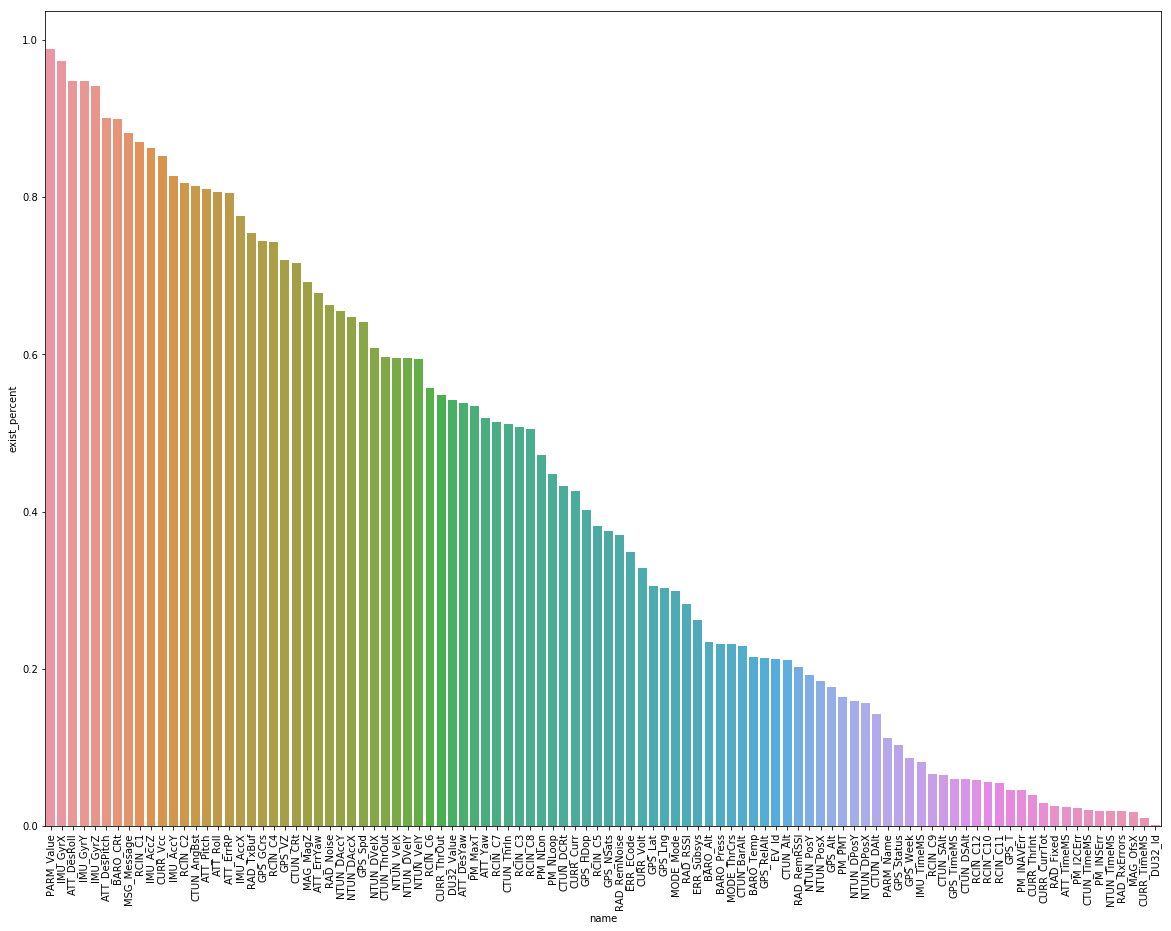

In [158]:
plt.figure(figsize=(20,15))
num_var = 100
g = sns.barplot(x='name',y='exist_percent',data=dt.iloc[:num_var,:])
g.set_xticklabels(labels=dt.iloc[:num_var,0],rotation=90)
plt.show()